In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



In [66]:
def ClassificationAccuracy(X,Y):
    correctlyPredicted = 0
    totalPredictions = np.size(X)
    
    for i in range(totalPredictions):     
        if X[i] == Y[i]:
            correctlyPredicted = correctlyPredicted + 1
    accuracy = correctlyPredicted / totalPredictions
    return accuracy

In [67]:
# Load and preprocess data
df = pd.read_csv("data.csv")
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X = df.drop(['diagnosis'], axis=1).values
X = StandardScaler().fit_transform(X)
Y = df['diagnosis'].values
# Splitting dataset into train and test set
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)



569


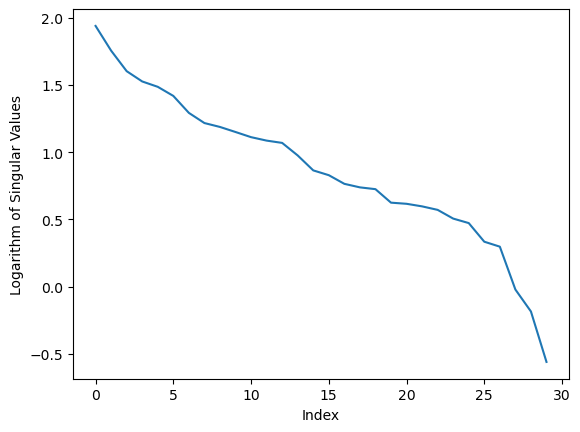

In [68]:
# SVD for dimensionality reduction
u, s, vh = np.linalg.svd(X, full_matrices=True)
plt.plot(np.log10(s))
plt.xlabel('Index')
plt.ylabel('Logarithm of Singular Values')
plt.show()



In [69]:

AccuracyMean = []
AccuracySd = []
F1Mean = []
F1Sd = []
OptimalK = []



In [70]:
# SVD Low Dimensionality Reduction - Picked from SVD Decomposition 
SvdLow = TruncatedSVD(n_components=2)
SvdLow.fit(X_train, y_train)
XTrainLow = SvdLow.transform(X_train)
XTestLow = SvdLow.transform(X_test)
print('Shape of Train Data after SVD Decomposition', XTrainLow.shape)
print('Shape of Test Data after SVD Decomposition', XTestLow.shape)

# Model fitting using SVD Low (Euclidean)

# KNN (Euclidean) - Parameter Tuning
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XTrainLow, y_train)
    y_pred = knn.predict(XTestLow)
    accuracy = ClassificationAccuracy(y_pred, y_test)
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after SVD Low Decomposition:', bestK)

# KNN (Euclidean) after SVD Low Decomposition using K from Hyper Parameter Tuning
SvdLowEucAccScores = []
SvdLowEucF1Scores = []
SvdLow = TruncatedSVD(n_components=2)
SvdLow.fit(X, Y)
XLow = SvdLow.transform(X)

for train_index, test_index in kf.split(XLow):
    XTrainLow, XTestLow = XLow[train_index], XLow[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK)
    knn.fit(XTrainLow, y_train)
    y_pred = knn.predict(XTestLow)
    
    # Calculating metrics
    acc = ClassificationAccuracy(y_pred, y_test)
    f1 = f1_score(y_test, y_pred)
    SvdLowEucAccScores.append(acc)
    SvdLowEucF1Scores.append(f1)
    
# Appending metrics
AccuracyMean.append(np.mean(SvdLowEucAccScores))
AccuracySd.append(np.std(SvdLowEucAccScores))
F1Mean.append(np.mean(SvdLowEucF1Scores))
F1Sd.append(np.std(SvdLowEucF1Scores))
print('Accuracy of KNN (Euclidean) using SVD Low - mean', np.mean(SvdLowEucAccScores), 'standard deviation', np.std(SvdLowEucAccScores))
print('F1 Score of KNN (Euclidean) using SVD Low - mean', np.mean(SvdLowEucF1Scores), 'standard deviation', np.std(SvdLowEucF1Scores))

# KNN (Manhattan) - Parameter Tuning
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(XTrainLow, y_train)
    y_pred = knn.predict(XTestLow)
    accuracy = ClassificationAccuracy(y_pred, y_test)
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after SVD Low Decomposition:', bestK)

# KNN (Manhattan) after SVD Low Decomposition using K from Hyper Parameter Tuning
SvdLowManAccScores = []
SvdLowManF1Scores = []

for train_index, test_index in kf.split(XLow):
    XTrainLow, XTestLow = XLow[train_index], XLow[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='manhattan')
    knn.fit(XTrainLow, y_train)
    y_pred = knn.predict(XTestLow)
    
    # Calculating metrics
    acc = ClassificationAccuracy(y_pred, y_test)
    f1 = f1_score(y_test, y_pred)
    SvdLowManAccScores.append(acc)
    SvdLowManF1Scores.append(f1)

# Appending metrics
AccuracyMean.append(np.mean(SvdLowManAccScores))
AccuracySd.append(np.std(SvdLowManAccScores))
F1Mean.append(np.mean(SvdLowManF1Scores))
F1Sd.append(np.std(SvdLowManF1Scores))
print('Accuracy of KNN (Manhattan) using SVD Low - mean', np.mean(SvdLowManAccScores), 'standard deviation', np.std(SvdLowManAccScores))
print('F1 Score of KNN (Manhattan) using SVD Low - mean', np.mean(SvdLowManF1Scores), 'standard deviation', np.std(SvdLowManF1Scores))


Shape of Train Data after SVD Decomposition (455, 2)
Shape of Test Data after SVD Decomposition (114, 2)
Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after SVD Low Decomposition: 27
Accuracy of KNN (Euclidean) using SVD Low - mean 0.931422305764411 standard deviation 0.018486602933939354
F1 Score of KNN (Euclidean) using SVD Low - mean 0.9005084689679187 standard deviation 0.03353520210658325
Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after SVD Low Decomposition: 1
Accuracy of KNN (Manhattan) using SVD Low - mean 0.9139411027568922 standard deviation 0.041031262799465486
F1 Score of KNN (Manhattan) using SVD Low - mean 0.8844511337769003 standard deviation 0.05178888056438279


In [74]:
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Apply SVD High Dimensionality Reduction on the entire dataset
SvdHigh = TruncatedSVD(n_components=20)
XHigh = SvdHigh.fit_transform(X)  # Transform the entire X dataset

# Now split the data using KFold and ensure consistency with y
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Parameter Tuning for KNN (Euclidean) after SVD High Decomposition
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XHigh[:int(0.8*len(XHigh))], Y[:int(0.8*len(Y))])  # Fit on 80% of the transformed data
    y_pred = knn.predict(XHigh[int(0.8*len(XHigh)):])  # Predict on 20% of the transformed data
    accuracy = ClassificationAccuracy(Y[int(0.8*len(Y)):], y_pred)
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after SVD High Decomposition:', bestK)

SvdHighEucAccScores = []
SvdHighEucF1Scores = []

# KNN (Euclidean) after SVD High Decomposition using K from Hyper Parameter Tuning
for train_index, test_index in kf.split(XHigh):
    XTrainHigh, XTestHigh = XHigh[train_index], XHigh[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK)
    knn.fit(XTrainHigh, y_train)
    y_pred = knn.predict(XTestHigh)
    
    # Calculating metrics
    acc = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    SvdHighEucAccScores.append(acc)
    SvdHighEucF1Scores.append(f1)

# Appending metrics
AccuracyMean.append(np.mean(SvdHighEucAccScores))
AccuracySd.append(np.std(SvdHighEucAccScores))
F1Mean.append(np.mean(SvdHighEucF1Scores))
F1Sd.append(np.std(SvdHighEucF1Scores))
print('Accuracy of KNN (Euclidean) using SVD High - mean', np.mean(SvdHighEucAccScores), 'standard deviation', np.std(SvdHighEucAccScores))
print('F1 Score of KNN (Euclidean) using SVD High - mean', np.mean(SvdHighEucF1Scores), 'standard deviation', np.std(SvdHighEucF1Scores))

# ------------------------------------------------------------

# KNN (Manhattan) - Parameter Tuning after SVD High Decomposition
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(XHigh[:int(0.8*len(XHigh))], Y[:int(0.8*len(Y))])  # Fit on 80% of the transformed data
    y_pred = knn.predict(XHigh[int(0.8*len(XHigh)):])  # Predict on 20% of the transformed data
    accuracy = ClassificationAccuracy(Y[int(0.8*len(Y)):], y_pred)
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after SVD High Decomposition:', bestK)

SvdHighManAccScores = []
SvdHighManF1Scores = []

# KNN (Manhattan) after SVD High Decomposition using K from Hyper Parameter Tuning
for train_index, test_index in kf.split(XHigh):
    XTrainHigh, XTestHigh = XHigh[train_index], XHigh[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='manhattan')
    knn.fit(XTrainHigh, y_train)
    y_pred = knn.predict(XTestHigh)
    
    # Calculating metrics
    acc = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    SvdHighManAccScores.append(acc)
    SvdHighManF1Scores.append(f1)

# Appending metrics
AccuracyMean.append(np.mean(SvdHighManAccScores))
AccuracySd.append(np.std(SvdHighManAccScores))
F1Mean.append(np.mean(SvdHighManF1Scores))
F1Sd.append(np.std(SvdHighManF1Scores))
print('Accuracy of KNN (Manhattan) using SVD High - mean', np.mean(SvdHighManAccScores), 'standard deviation', np.std(SvdHighManAccScores))
print('F1 Score of KNN (Manhattan) using SVD High - mean', np.mean(SvdHighManF1Scores), 'standard deviation', np.std(SvdHighManF1Scores))


Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after SVD High Decomposition: 11
Accuracy of KNN (Euclidean) using SVD High - mean 0.968295739348371 standard deviation 0.020697946089662505
F1 Score of KNN (Euclidean) using SVD High - mean 0.9551162632885323 standard deviation 0.032836930582472446
Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after SVD High Decomposition: 19
Accuracy of KNN (Manhattan) using SVD High - mean 0.9542293233082708 standard deviation 0.02532384655768864
F1 Score of KNN (Manhattan) using SVD High - mean 0.9335533410700723 standard deviation 0.04058555915551888


In [75]:
print("Shape of XTrainHigh:", XTrainHigh.shape)
print("Shape of y_train:", y_train.shape)


Shape of XTrainHigh: (513, 20)
Shape of y_train: (513,)


In [76]:
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.models import Model

n = X_train.shape[1]
newSize = int(n * 0.05)  # 5% of original data dimensionality

# Input layer
input_layer = Input(shape=(n,))

# One ReLU encoder layer
encode = Dense(newSize)(input_layer)
encode = ReLU()(encode)

# One ReLU decoder layer
decode = Dense(n)(encode)
decode = ReLU()(decode)

# Define the autoencoder model
autoencoder = Model(input_layer, decode)
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the autoencoder model
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Dimensionality reduction model
mlp5DimRedModel = Model(inputs=input_layer, outputs=encode)

# Transform the training, test, and entire datasets
XTrainMLP5 = mlp5DimRedModel.predict(X_train)
XTestMLP5 = mlp5DimRedModel.predict(X_test)
XMLP5 = mlp5DimRedModel.predict(X)

# Display the shapes of the transformed datasets
print("Shape of XTrainMLP5:", XTrainMLP5.shape)
print("Shape of XTestMLP5:", XTestMLP5.shape)
print("Shape of XMLP5:", XMLP5.shape)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9314 - val_loss: 0.9523
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9392 - val_loss: 0.9439
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8340 - val_loss: 0.9370
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8727 - val_loss: 0.9302
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9222 - val_loss: 0.9239
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9144 - val_loss: 0.9172
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9269 - val_loss: 0.9116
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9047 - val_loss: 0.9064
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9200 - val_loss: 0.9019
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8620 - val_loss: 0.8979
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8548 - val_loss: 0.8941
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import KFold

# Apply MLP 5% Dimensionality Reduction to the Entire Dataset
X = StandardScaler().fit_transform(X)  # Ensure the data is scaled before using MLP/autoencoder
XMLP5 = mlp5DimRedModel.predict(X)

# Ensure consistent dimensionality and splits across K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# KNN (Euclidean) - Parameter Tuning
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    for train_index, test_index in kf.split(XMLP5):
        XTrainMLP5, XTestMLP5 = XMLP5[train_index], XMLP5[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn.fit(XTrainMLP5, y_train)
        y_pred = knn.predict(XTestMLP5)
        accuracy = ClassificationAccuracy(y_test, y_pred)
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after MLP 5%:', bestK)

MLP5EucAccScores = []
MLP5EucF1Scores = []

# KNN (Euclidean) after MLP 5% Dimensionality Reduction using K from Hyperparameter Tuning
for train_index, test_index in kf.split(XMLP5):
    XTrainMLP5, XTestMLP5 = XMLP5[train_index], XMLP5[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='euclidean')
    knn.fit(XTrainMLP5, y_train)
    y_pred = knn.predict(XTestMLP5)
    
    # Calculating Metrics
    acc = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    MLP5EucAccScores.append(acc)
    MLP5EucF1Scores.append(f1)

# Appending metrics
AccuracyMean.append(np.mean(MLP5EucAccScores))
AccuracySd.append(np.std(MLP5EucAccScores))
F1Mean.append(np.mean(MLP5EucF1Scores))
F1Sd.append(np.std(MLP5EucF1Scores))
print('Accuracy of KNN (Euclidean) using MLP 5% - mean', np.mean(MLP5EucAccScores), 'standard deviation', np.std(MLP5EucAccScores))
print('F1 Score of KNN (Euclidean) using MLP 5% - mean', np.mean(MLP5EucF1Scores), 'standard deviation', np.std(MLP5EucF1Scores))

# ------------------------------------------------------------

# KNN (Manhattan) - Parameter Tuning
maxAccuracy = 0
bestK = 0
for i in range(1, 51, 2):
    for train_index, test_index in kf.split(XMLP5):
        XTrainMLP5, XTestMLP5 = XMLP5[train_index], XMLP5[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
        knn.fit(XTrainMLP5, y_train)
        y_pred = knn.predict(XTestMLP5)
        accuracy = ClassificationAccuracy(y_test, y_pred)
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            bestK = i
OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after MLP 5%:', bestK)

MLP5ManAccScores = []
MLP5ManF1Scores = []

# KNN (Manhattan) after MLP 5% Dimensionality Reduction using K from Hyperparameter Tuning
for train_index, test_index in kf.split(XMLP5):
    XTrainMLP5, XTestMLP5 = XMLP5[train_index], XMLP5[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='manhattan')
    knn.fit(XTrainMLP5, y_train)
    y_pred = knn.predict(XTestMLP5)
    
    # Calculating Metrics
    acc = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    MLP5ManAccScores.append(acc)
    MLP5ManF1Scores.append(f1)

# Appending metrics
AccuracyMean.append(np.mean(MLP5ManAccScores))
AccuracySd.append(np.std(MLP5ManAccScores))
F1Mean.append(np.mean(MLP5ManF1Scores))
F1Sd.append(np.std(MLP5ManF1Scores))
print('Accuracy of KNN (Manhattan) using MLP 5% - mean', np.mean(MLP5ManAccScores), 'standard deviation', np.std(MLP5ManAccScores))
print('F1 Score of KNN (Manhattan) using MLP 5% - mean', np.mean(MLP5ManF1Scores), 'standard deviation', np.std(MLP5ManF1Scores))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after MLP 5%: 11
Accuracy of KNN (Euclidean) using MLP 5% - mean 0.8682330827067668 standard deviation 0.03603497798938883
F1 Score of KNN (Euclidean) using MLP 5% - mean 0.8204740413746624 standard deviation 0.04656327680570592
Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after MLP 5%: 11
Accuracy of KNN (Manhattan) using MLP 5% - mean 0.8682330827067668 standard deviation 0.03603497798938883
F1 Score of KNN (Manhattan) using MLP 5% - mean 0.8204740413746624 standard deviation 0.04656327680570592


In [82]:
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.models import Model

n = X_train.shape[1]
newSize = int(n * 0.2)  # 20% of original data dimensionality

# Input layer
input_layer = Input(shape=(n,))

# One encoder layer with ReLU activation
encode = Dense(newSize)(input_layer)
encode = ReLU()(encode)

# One decoder layer with ReLU activation
decode = Dense(n)(encode)
decode = ReLU()(decode)

# Define the autoencoder model
autoencoder = Model(input_layer, decode)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Create a model for dimensionality reduction
mlp20DimRedModel = Model(inputs=input_layer, outputs=encode)

# Apply dimensionality reduction
XTrainMLP20 = mlp20DimRedModel.predict(X_train)
XTestMLP20 = mlp20DimRedModel.predict(X_test)
XMLP20 = mlp20DimRedModel.predict(X)

# Check the shapes of the reduced datasets
print("Shape of XTrainMLP20:", XTrainMLP20.shape)
print("Shape of XTestMLP20:", XTestMLP20.shape)
print("Shape of XMLP20:", XMLP20.shape)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9829 - val_loss: 0.9804
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9032 - val_loss: 0.9441
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9320 - val_loss: 0.9145
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8606 - val_loss: 0.8909
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8995 - val_loss: 0.8679
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9115 - val_loss: 0.8461
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7892 - val_loss: 0.8277
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8548 - val_loss: 0.8114
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8119 - val_loss: 0.7965
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7801 - val_loss: 0.7817
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7349 - val_loss: 0.7685
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming XMLP20 (reduced data) and Y (target labels) are already defined.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# ------------------------------------------------------------
# KNN (Euclidean) - Parameter Tuning
maxAccuracy = 0
bestK = 0

for train_index, test_index in kf.split(XMLP20):
    XTrainMLP20, XTestMLP20 = XMLP20[train_index], XMLP20[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    for i in range(1, 51, 2):
        # Initialize and fit KNN model with Euclidean distance
        knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn.fit(XTrainMLP20, y_train)

        # Make predictions and calculate accuracy
        y_pred = knn.predict(XTestMLP20)
        accuracy = ClassificationAccuracy(y_test, y_pred)

        # Track the best K based on accuracy
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            bestK = i

OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after MLP 20%:', bestK)

# ------------------------------------------------------------
# KNN (Euclidean) - Evaluation with Best K
MLP20EucAccScores = []
MLP20EucF1Scores = []

for train_index, test_index in kf.split(XMLP20):
    # Split data according to K-Fold
    XTrainMLP20, XTestMLP20 = XMLP20[train_index], XMLP20[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Initialize and fit KNN model with the best K and Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='euclidean')
    knn.fit(XTrainMLP20, y_train)
    
    # Make predictions and calculate metrics
    y_pred = knn.predict(XTestMLP20)
    accuracy = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append scores to respective lists
    MLP20EucAccScores.append(accuracy)
    MLP20EucF1Scores.append(f1)

# Calculate and print mean and standard deviation of metrics
AccuracyMean.append(np.mean(MLP20EucAccScores))
AccuracySd.append(np.std(MLP20EucAccScores))
F1Mean.append(np.mean(MLP20EucF1Scores))
F1Sd.append(np.std(MLP20EucF1Scores))

print('Accuracy of KNN (Euclidean) using MLP 20% - mean:', np.mean(MLP20EucAccScores), 'standard deviation:', np.std(MLP20EucAccScores))
print('F1 Score of KNN (Euclidean) using MLP 20% - mean:', np.mean(MLP20EucF1Scores), 'standard deviation:', np.std(MLP20EucF1Scores))

# ------------------------------------------------------------
# KNN (Manhattan) - Parameter Tuning
maxAccuracy = 0
bestK = 0

for train_index, test_index in kf.split(XMLP20):
    XTrainMLP20, XTestMLP20 = XMLP20[train_index], XMLP20[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    for i in range(1, 51, 2):
        # Initialize and fit KNN model with Manhattan distance
        knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
        knn.fit(XTrainMLP20, y_train)

        # Make predictions and calculate accuracy
        y_pred = knn.predict(XTestMLP20)
        accuracy = ClassificationAccuracy(y_test, y_pred)

        # Track the best K based on accuracy
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            bestK = i

OptimalK.append(bestK)
print('Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after MLP 20%:', bestK)

# ------------------------------------------------------------
# KNN (Manhattan) - Evaluation with Best K
MLP20ManAccScores = []
MLP20ManF1Scores = []

for train_index, test_index in kf.split(XMLP20):
    # Split data according to K-Fold
    XTrainMLP20, XTestMLP20 = XMLP20[train_index], XMLP20[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Initialize and fit KNN model with the best K and Manhattan distance
    knn = KNeighborsClassifier(n_neighbors=bestK, metric='manhattan')
    knn.fit(XTrainMLP20, y_train)
    
    # Make predictions and calculate metrics
    y_pred = knn.predict(XTestMLP20)
    accuracy = ClassificationAccuracy(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append scores to respective lists
    MLP20ManAccScores.append(accuracy)
    MLP20ManF1Scores.append(f1)

# Calculate and print mean and standard deviation of metrics
AccuracyMean.append(np.mean(MLP20ManAccScores))
AccuracySd.append(np.std(MLP20ManAccScores))
F1Mean.append(np.mean(MLP20ManF1Scores))
F1Sd.append(np.std(MLP20ManF1Scores))

print('Accuracy of KNN (Manhattan) using MLP 20% - mean:', np.mean(MLP20ManAccScores), 'standard deviation:', np.std(MLP20ManAccScores))
print('F1 Score of KNN (Manhattan) using MLP 20% - mean:', np.mean(MLP20ManF1Scores), 'standard deviation:', np.std(MLP20ManF1Scores))


Best K value after Hyper Parameter Tuning for KNN Model (Euclidean) after MLP 20%: 1
Accuracy of KNN (Euclidean) using MLP 20% - mean: 0.9472744360902254 standard deviation: 0.027180292969170017
F1 Score of KNN (Euclidean) using MLP 20% - mean: 0.9284277087422007 standard deviation: 0.039746874964574304
Best K value after Hyper Parameter Tuning for KNN Model (Manhattan) after MLP 20%: 1
Accuracy of KNN (Manhattan) using MLP 20% - mean: 0.9402255639097745 standard deviation: 0.023855976318482585
F1 Score of KNN (Manhattan) using MLP 20% - mean: 0.9192823670192091 standard deviation: 0.035726236945511844


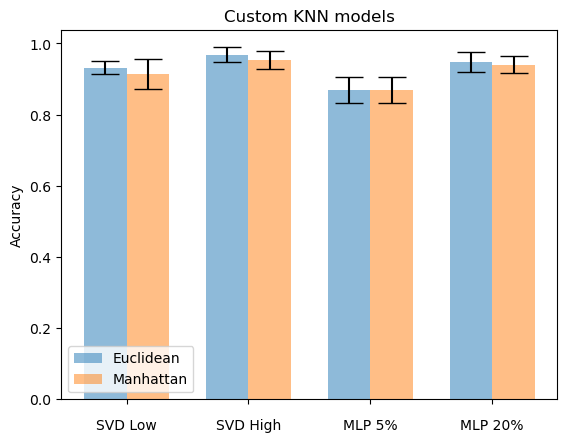

In [86]:
labels = ['SVD Low', 'SVD High', 'MLP 5%', 'MLP 20%']

dist_labels = ['Euclidean', 'Manhattan']

x_pos = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos - width/2, AccuracyMean[::2], width, yerr=AccuracySd[::2], align='center', alpha=0.5, ecolor='black', capsize=10, label=dist_labels[0])
rects2 = ax.bar(x_pos + width/2, AccuracyMean[1::2], width, yerr=AccuracySd[1::2], align='center', alpha=0.5, ecolor='black', capsize=10, label=dist_labels[1])

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', which='major', pad=10)

ax.set_ylabel('Accuracy')
ax.set_title('Custom KNN models')
ax.legend()
plt.show()


In [87]:
print(F1Mean)
print(F1Sd)

[0.9005084689679187, 0.8844511337769003, 0.9551162632885323, 0.9335533410700723, 0.8204740413746624, 0.8204740413746624, 0.9284277087422007, 0.9192823670192091]
[0.03353520210658325, 0.05178888056438279, 0.032836930582472446, 0.04058555915551888, 0.04656327680570592, 0.04656327680570592, 0.039746874964574304, 0.035726236945511844]


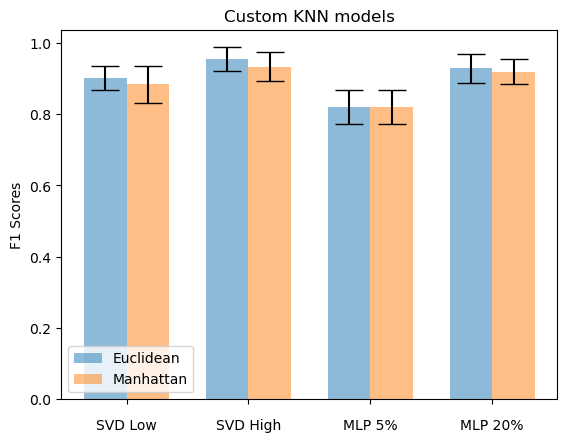

In [88]:
labels = ['SVD Low', 'SVD High', 'MLP 5%', 'MLP 20%']
dist_labels = ['Euclidean', 'Manhattan']

width = 0.35

x_pos = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos - width/2, F1Mean[::2], width, yerr=F1Sd[::2], align='center', alpha=0.5, ecolor='black', capsize=10, label=dist_labels[0])
rects2 = ax.bar(x_pos + width/2, F1Mean[1::2], width, yerr=F1Sd[1::2], align='center', alpha=0.5, ecolor='black', capsize=10, label=dist_labels[1])

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', which='major', pad=10)

ax.set_ylabel('F1 Scores')
ax.set_title('Custom KNN models')
ax.legend()
plt.show()

In [90]:
from prettytable import PrettyTable

# Euclidean distance table
t = PrettyTable(['Model', 'Optimal K', 'Accuracy', 'F1'])

# Add rows for each model under Euclidean distance
t.add_row(['SVD "Low Rank"', str(OptimalK[0]), 
           str(round(AccuracyMean[0], 2)) + '/' + str(round(AccuracySd[0], 2)),
           str(round(F1Mean[0], 2)) + '/' + str(round(F1Sd[0], 2))])

t.add_row(['SVD "High Rank"', str(OptimalK[2]),
           str(round(AccuracyMean[2], 2)) + '/' + str(round(AccuracySd[2], 2)),
           str(round(F1Mean[2], 2)) + '/' + str(round(F1Sd[2], 2))])

t.add_row(['MLP 5%', str(OptimalK[4]), 
           str(round(AccuracyMean[4], 2)) + '/' + str(round(AccuracySd[4], 2)),
           str(round(F1Mean[4], 2)) + '/' + str(round(F1Sd[4], 2))])

t.add_row(['MLP 20%', str(OptimalK[6]), 
           str(round(AccuracyMean[6], 2)) + '/' + str(round(AccuracySd[6], 2)),
           str(round(F1Mean[6], 2)) + '/' + str(round(F1Sd[6], 2))])

print("Euclidean Distance Results:")
print(t)

# Manhattan distance table
s = PrettyTable(['Model', 'Optimal K', 'Accuracy', 'F1'])

# Add rows for each model under Manhattan distance
s.add_row(['SVD "Low Rank"', str(OptimalK[1]), 
           str(round(AccuracyMean[1], 2)) + '/' + str(round(AccuracySd[1], 2)),
           str(round(F1Mean[1], 2)) + '/' + str(round(F1Sd[1], 2))])

s.add_row(['SVD "High Rank"', str(OptimalK[3]), 
           str(round(AccuracyMean[3], 2)) + '/' + str(round(AccuracySd[3], 2)),
           str(round(F1Mean[3], 2)) + '/' + str(round(F1Sd[3], 2))])

s.add_row(['MLP 5%', str(OptimalK[5]), 
           str(round(AccuracyMean[5], 2)) + '/' + str(round(AccuracySd[5], 2)),
           str(round(F1Mean[5], 2)) + '/' + str(round(F1Sd[5], 2))])

s.add_row(['MLP 20%', str(OptimalK[7]), 
           str(round(AccuracyMean[7], 2)) + '/' + str(round(AccuracySd[7], 2)),
           str(round(F1Mean[7], 2)) + '/' + str(round(F1Sd[7], 2))])

print("Manhattan Distance Results:")
print(s)


Euclidean Distance Results:
+-----------------+-----------+-----------+-----------+
|      Model      | Optimal K |  Accuracy |     F1    |
+-----------------+-----------+-----------+-----------+
|  SVD "Low Rank" |     27    | 0.93/0.02 |  0.9/0.03 |
| SVD "High Rank" |     11    | 0.97/0.02 | 0.96/0.03 |
|      MLP 5%     |     11    | 0.87/0.04 | 0.82/0.05 |
|     MLP 20%     |     1     | 0.95/0.03 | 0.93/0.04 |
+-----------------+-----------+-----------+-----------+
Manhattan Distance Results:
+-----------------+-----------+-----------+-----------+
|      Model      | Optimal K |  Accuracy |     F1    |
+-----------------+-----------+-----------+-----------+
|  SVD "Low Rank" |     1     | 0.91/0.04 | 0.88/0.05 |
| SVD "High Rank" |     19    | 0.95/0.03 | 0.93/0.04 |
|      MLP 5%     |     11    | 0.87/0.04 | 0.82/0.05 |
|     MLP 20%     |     1     | 0.94/0.02 | 0.92/0.04 |
+-----------------+-----------+-----------+-----------+


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming XMLP20 (reduced data) and Y (target labels) are already defined.
# Also assuming OptimalK has the best K values for each configuration.

# Define number of splits for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each model configuration
AccuracyMean, AccuracySd, F1Mean, F1Sd = [], [], [], []

# Define distance metrics and model labels
distance_metrics = ['euclidean', 'manhattan']
model_labels = ['SVD Low', 'SVD High', 'MLP 5%', 'MLP 20%']

# Assuming OptimalK contains optimal K values for each model configuration
for i, model_label in enumerate(model_labels):
    for j, metric in enumerate(distance_metrics):
        k_value = OptimalK[i * 2 + j]  # Optimal K for this model and metric
        accuracies, f1_scores = [], []

        # Perform K-Fold Cross-Validation
        for train_index, test_index in kf.split(XMLP20):
            X_train, X_test = XMLP20[train_index], XMLP20[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            # Initialize and train the KNN classifier with the chosen distance metric and K value
            knn = KNeighborsClassifier(n_neighbors=k_value, metric=metric)
            knn.fit(X_train, y_train)
            
            # Make predictions and calculate metrics
            y_pred = knn.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        # Calculate mean and standard deviation for accuracy and F1 score
        AccuracyMean.append(np.mean(accuracies))
        AccuracySd.append(np.std(accuracies))
        F1Mean.append(np.mean(f1_scores))
        F1Sd.append(np.std(f1_scores))

# Print the results
for idx, label in enumerate(model_labels):
    print(f"{label} (Euclidean): Accuracy = {AccuracyMean[idx*2]:.2f} ± {AccuracySd[idx*2]:.2f}, "
          f"F1 = {F1Mean[idx*2]:.2f} ± {F1Sd[idx*2]:.2f}")
    print(f"{label} (Manhattan): Accuracy = {AccuracyMean[idx*2 + 1]:.2f} ± {AccuracySd[idx*2 + 1]:.2f}, "
          f"F1 = {F1Mean[idx*2 + 1]:.2f} ± {F1Sd[idx*2 + 1]:.2f}")


SVD Low (Euclidean): Accuracy = 0.94 ± 0.02, F1 = 0.91 ± 0.04
SVD Low (Manhattan): Accuracy = 0.94 ± 0.02, F1 = 0.92 ± 0.04
SVD High (Euclidean): Accuracy = 0.94 ± 0.02, F1 = 0.91 ± 0.03
SVD High (Manhattan): Accuracy = 0.94 ± 0.02, F1 = 0.91 ± 0.03
MLP 5% (Euclidean): Accuracy = 0.94 ± 0.02, F1 = 0.91 ± 0.03
MLP 5% (Manhattan): Accuracy = 0.94 ± 0.02, F1 = 0.92 ± 0.03
MLP 20% (Euclidean): Accuracy = 0.95 ± 0.03, F1 = 0.93 ± 0.04
MLP 20% (Manhattan): Accuracy = 0.94 ± 0.02, F1 = 0.92 ± 0.04


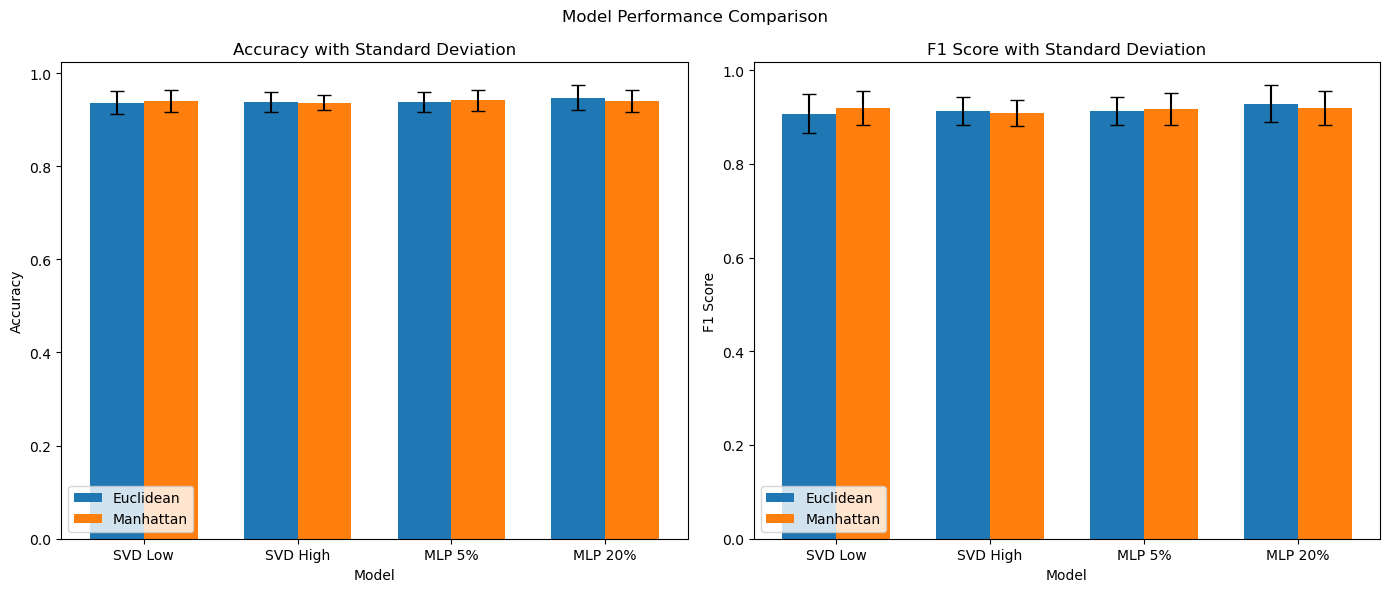

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming AccuracyMean, AccuracySd, F1Mean, F1Sd are calculated as in the previous example

labels = ['SVD Low', 'SVD High', 'MLP 5%', 'MLP 20%']
dist_metrics = ['Euclidean', 'Manhattan']
x = np.arange(len(labels))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy
ax1.bar(x - width/2, AccuracyMean[::2], width, yerr=AccuracySd[::2], label='Euclidean', capsize=5)
ax1.bar(x + width/2, AccuracyMean[1::2], width, yerr=AccuracySd[1::2], label='Manhattan', capsize=5)
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy with Standard Deviation')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# Plot F1 Score
ax2.bar(x - width/2, F1Mean[::2], width, yerr=F1Sd[::2], label='Euclidean', capsize=5)
ax2.bar(x + width/2, F1Mean[1::2], width, yerr=F1Sd[1::2], label='Manhattan', capsize=5)
ax2.set_xlabel('Model')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score with Standard Deviation')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

plt.suptitle('Model Performance Comparison')
plt.tight_layout()
plt.show()
